# Bank Loan Case Study

The main aim of this project is to identify patterns that indicate if a customer will have difficulty paying their installments. This information can be used to make decisions such as denying the loan, reducing the amount of loan, or lending at a higher interest rate to risky applicants. The company wants to understand the key factors behind loan default so it can make better decisions about loan approval.

The datasets are available in the link - https://drive.google.com/file/d/1zO-NwZ84KAgGNz7PTkIEKik9t2Q3mbFY/view?usp=sharing

In [253]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [254]:
# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Reaing column description csv
col_des = pd.read_csv('columns_description.csv', encoding='latin1', usecols=lambda column: column != 'Column No.')
col_des

,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,application_data,AMT_ANNUITY,Loan annuity,NaN


In [255]:
df_app = pd.read_csv(r'application_data.csv')
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [256]:
# Set the option to display all columns
# pd.set_option('display.max_columns', None)
# print(list(df_app.columns))

In [257]:
df_prev_app = pd.read_csv(r'previous_application.csv')
df_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Cleaning the application_data 

In [258]:
df_app.isnull().sum(axis=0).sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [259]:
# checking precent of null values
missing_val= round(df_app.isnull().sum(axis=0).sort_values(ascending=False)/len(df_app)*100,2)
missing_val

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [260]:
# Columns with missing values greater than 30%
null = missing_val[missing_val > 30]
null.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

Dropping all these columns, since there have very large number of missing values.

In [261]:
# Dropping all the columns with values than 30%
df_app.drop(columns=null.index, inplace=True)

In [262]:
# Checking for the null values again
round(df_app.isnull().sum(axis=0).sort_values(ascending=False)/len(df_app)*100, 2)

EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_18                0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_21                0.00
FLAG_DOCUMENT_20                0.00
FLAG_DOCUMENT_19                0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_17                0.00
F

In [263]:
# Removing all the FLAG_DOCUMENT columns and also removing the columns that will not be useful for analysis
df_app.drop(columns=['SK_ID_CURR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
                     'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                     'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                     'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                     'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
                     'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                     'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'], inplace=True)

In [264]:
df_app.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [265]:
pd.set_option('display.max_columns', None)
df_app.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,-828.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0


In [266]:
# Converting the negative values of DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE
# into positive
df_app[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']] = df_app[[
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].abs()

# Converting the days to years
df_app['YEARS_BIRTH'] = round(df_app['DAYS_BIRTH']/365, 2)
df_app['YEARS_EMPLOYED'] = round(df_app['DAYS_EMPLOYED']/365, 2)
df_app['YEARS_REGISTRATION'] = round(df_app['DAYS_REGISTRATION']/365, 2)
df_app['YEARS_ID_PUBLISH'] = round(df_app['DAYS_ID_PUBLISH']/365, 2)
df_app['YEARS_LAST_PHONE_CHANGE'] = round(df_app['DAYS_LAST_PHONE_CHANGE']/365, 2)

# Dropping DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH columns
df_app.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], inplace=True)

# Viewing the head of dataframe
df_app.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,25.92,1.75,9.99,5.81,3.11
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,45.93,3.25,3.25,0.80,2.27
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,52.18,0.62,11.67,6.93,2.23
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,52.07,8.33,26.94,6.68,1.69
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,54.61,8.32,11.81,9.47,3.03


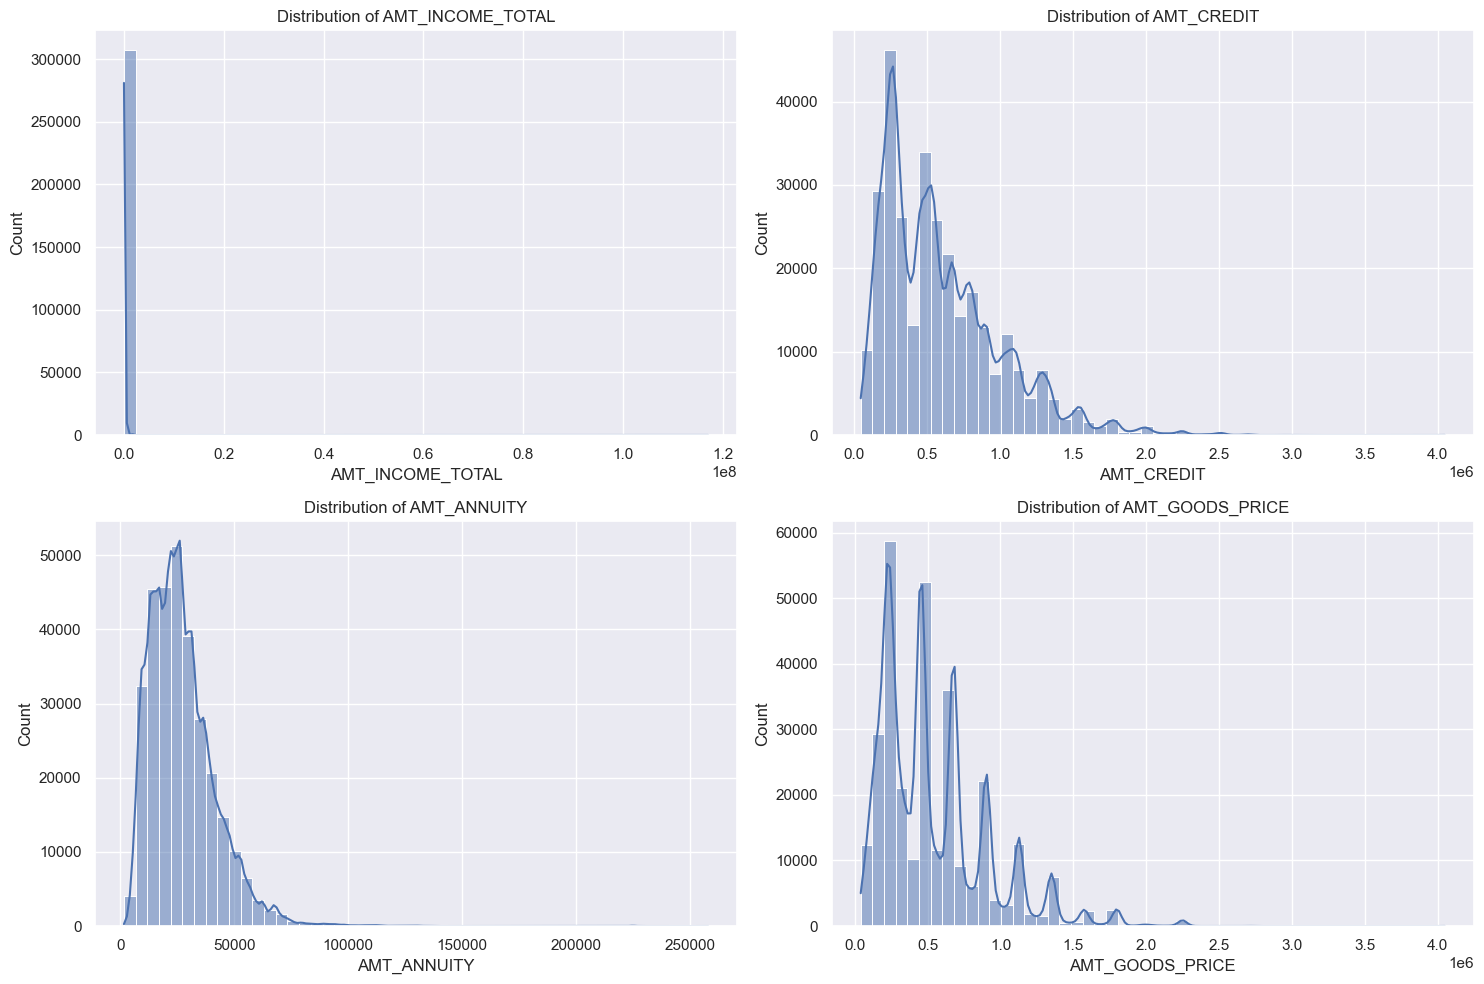

In [267]:
# Checking the data distribution
numeric_columns = df_app[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df_app[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

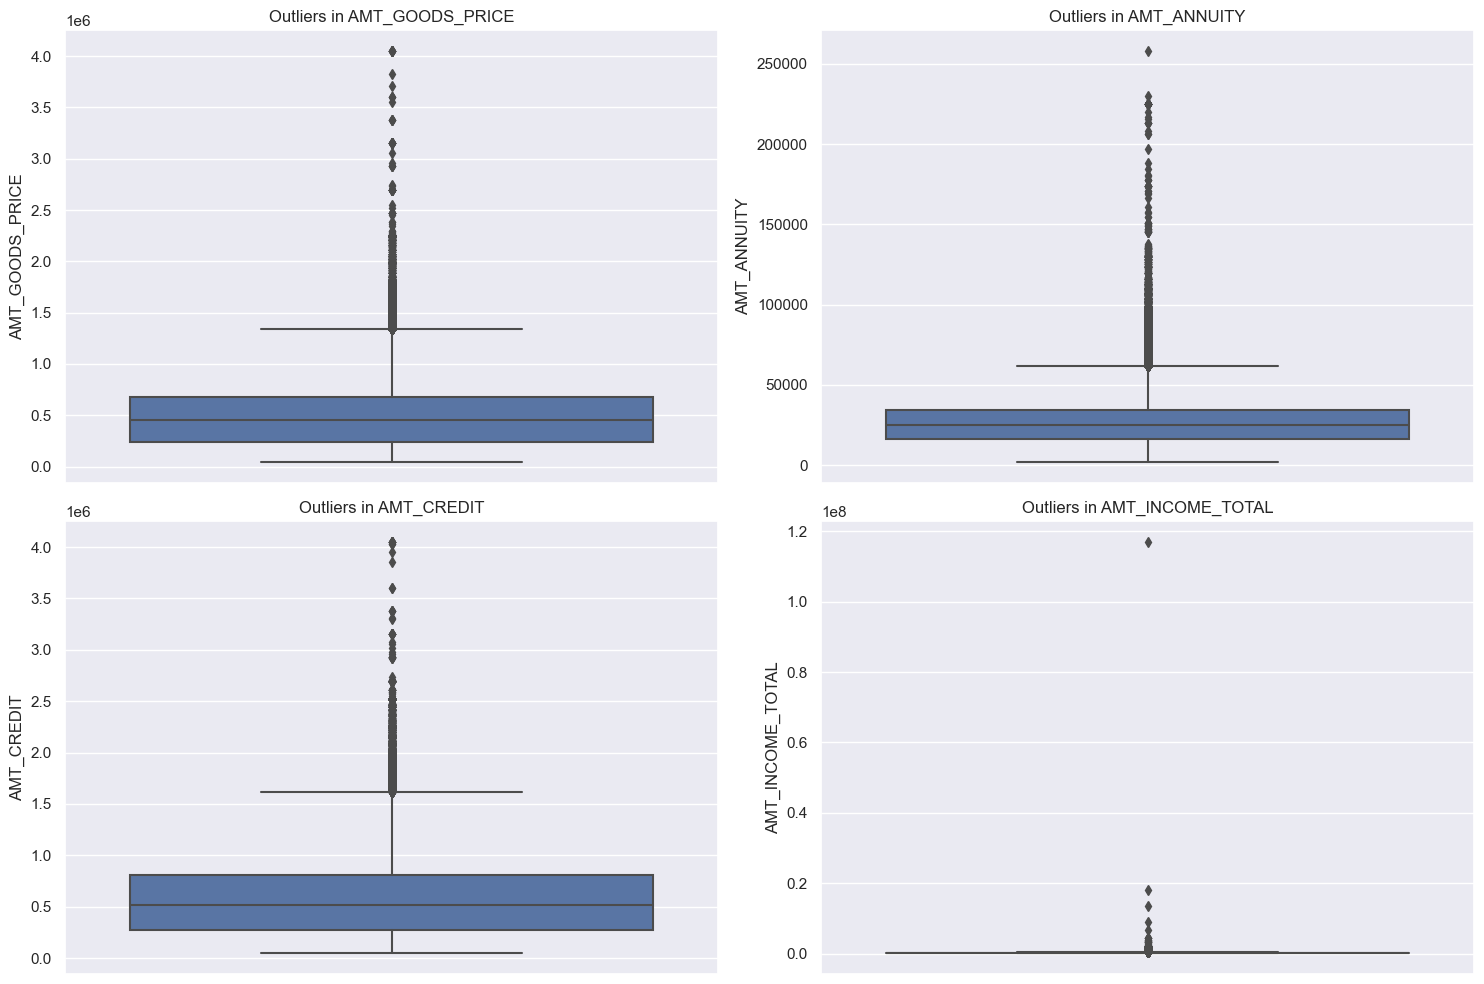

In [268]:
columns_box_plot = df_app[['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']]

n=1
plt.figure(figsize=(15,10))

for column in columns_box_plot:
    plt.subplot(2,2,n)
    n += 1
    
    sns.boxplot(y = column, data=df_app)
    plt.title(f'Outliers in {column}')
    
plt.tight_layout()
plt.show()

In [269]:
# Finding median of AMT_ANNUITY column
med_AMT_ANNUITY = round(df_app.AMT_ANNUITY.median(),2)
print('The median of the column AMT_ANNUITY = ', med_AMT_ANNUITY)

# Filling all the blank places with the median value
df_app['AMT_ANNUITY'].fillna(med_AMT_ANNUITY, inplace=True)
print('The null values in AMT_ANNUITY = ', df_app['AMT_ANNUITY'].isnull().sum())

The median of the column AMT_ANNUITY =  24903.0
The null values in AMT_ANNUITY =  0


In [ ]:
# Imputing null values with AMT_CREDIT based on the assumption that the amount of loan taken is equal to the 
# amount of goods purchase:
df_app['AMT_GOODS_PRICE'].fillna(df_app['AMT_CREDIT'], inplace=True)
df_app[['AMT_GOODS_PRICE', 'AMT_CREDIT']]

In [ ]:
# Checking for null values in AMT_GOODS_PRICE
print('The null values in AMT_GOODS_PRICE = ', df_app['AMT_GOODS_PRICE'].isnull().sum())

In [ ]:
# Checking the value count for NAME_TYPE_SUITE column 
df_app['NAME_TYPE_SUITE'].value_counts()

In [ ]:
# Since most of the values in the NAME_TYPE_SUITE are for Unaccompanied, filling the missing values with 
# Unaccompanied will be right.
df_app['NAME_TYPE_SUITE'].fillna('Unaccompained', inplace=True)

# Checking for null values 
print('After filling the missing values with "Unaccompained", the null values left = ', 
     df_app['NAME_TYPE_SUITE'].isna().sum())

In [ ]:
# Creating the boxplot for EXT_SOURCE_2 and EXT_SOURCE_3 to see the outliers
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y = 'EXT_SOURCE_2', data=df_app, ax=axes[0])
sns.boxplot(y = 'EXT_SOURCE_3', data=df_app, ax=axes[1])


In [ ]:
# Plotting histplot for EXT_SOURCE_2 and EXT_SOURCE_3

fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(x=df_app['EXT_SOURCE_2'], bins=30, kde=True, ax=ax[0])
sns.histplot(x=df_app['EXT_SOURCE_3'], bins=30, kde=True, ax=ax[1])

ax[0].vlines(x=df_app['EXT_SOURCE_2'].mean(), ymin=0, ymax=25000, 
             color='red', linestyle='--', label=f'Mean: {df_app["EXT_SOURCE_2"].mean():.2f}')
ax[0].vlines(x=df_app['EXT_SOURCE_2'].median(), ymin=0, ymax=25000, 
             color='orange', linestyle='-.', label=f'Median: {df_app["EXT_SOURCE_2"].median():.2f}')

ax[1].vlines(x=df_app['EXT_SOURCE_3'].mean(), ymin=0, ymax=14000, 
             color='red', linestyle='--', label=f'Mean: {df_app["EXT_SOURCE_3"].mean():.2f}')
ax[1].vlines(x=df_app['EXT_SOURCE_3'].median(), ymin=0, ymax=14000, 
             color='orange', linestyle='-.', label=f'Median: {df_app["EXT_SOURCE_3"].median():.2f}')

ax[0].legend()
ax[1].legend()
plt.show()

We see that there are no outliers in the data but the histplot are skewed.  
So, chosing the median will be a good choice to fill the null values.

In [ ]:
# Filling the null values in EXT_SOURCE_2 and EXT_SOURCE_3 with median values
df_app['EXT_SOURCE_2'].fillna(df_app['EXT_SOURCE_2'].median(), inplace=True)
df_app['EXT_SOURCE_3'].fillna(df_app['EXT_SOURCE_3'].median(), inplace=True)

print('After filling the null values in EXT_SOURCE_2 with median values, the null values left are = ',
     df_app['EXT_SOURCE_2'].isna().sum())
print('After filling the null values in EXT_SOURCE_3 with median values, the null values left are = ',
     df_app['EXT_SOURCE_3'].isna().sum())

In [ ]:
# Removing the row(s) containing null values in CNT_FAM_MEMBERS and YEARS_LAST_PHONE_CHANGE columns
df_app.dropna(subset=['CNT_FAM_MEMBERS', 'YEARS_LAST_PHONE_CHANGE'], inplace=True)

print(f'The null values left in the column CNT_FAM_MEMBERS = {df_app["CNT_FAM_MEMBERS"].isna().sum()} and the null values left in the column YEARS_LAST_PHONE_CHANGE = {df_app["YEARS_LAST_PHONE_CHANGE"].isna().sum()}')

In [ ]:
# Checking for outliers in YEARS_EMPLOYED
sns.boxplot(df_app['YEARS_EMPLOYED'])

From the boxplot we see that the outlier is present at 1000 and this value is absurd as no one can live 1000 years.  
Therefore we have to remove the outlier.

In [ ]:
# Checking the value counts to see if the outlier is at 1000 or slightly above or below it 
print(df_app['YEARS_EMPLOYED'].value_counts()) 
print('                        ------------------------')
print('It is confirmed that outliers are present at 1000.67.')

In [ ]:
# # Remove values greater than 65 from the YEARS_EMPLOYED column
df_app = df_app[df_app['YEARS_EMPLOYED'] <= 65]

In [ ]:
# Checking for duplicate values
print('Duplicate rows in dataframe application data = ', df_app.duplicated().sum())

In [ ]:
# Checking for datatypes and other information of columns
df_app.info()

In [ ]:
# Converting the AMT_INCOME_TOTAL into Lakhs upto 2 decimals
df_app['AMT_INCOME_TOTAL_in_lakhs'] = round(df_app['AMT_INCOME_TOTAL']/100000, 2)

# Converting the AMT_CREDIT into Lakhs upto 2 decimals
df_app['AMT_CREDIT_in_lakhs'] = round(df_app['AMT_INCOME_TOTAL']/100000, 2)

# Converting the AMT_ANNUITY into Lakhs upto 2 decimals
df_app['AMT_ANNUITY_in_lakhs'] = round(df_app['AMT_ANNUITY']/100000, 2)

# Converting the AMT_GOODS_PRICE into Lakhs upto 2 decimals
df_app['AMT_GOODS_PRICE_in_lakhs'] = round(df_app['AMT_GOODS_PRICE']/100000, 2)

In [ ]:
# Feature Engineering - 
# Creating class interval from YEARS_BIRTH column
df_app['AGE_INTERVAL'] = pd.cut(df_app['YEARS_BIRTH'], bins=[0, 30, 40, 50, 60, 70], 
                                labels=['20-30', '30-40', '40-50', '50-60', '60-70'])


# Binning the AMT_INCOME_TOTAL column
df_app['AMT_INCOME_TOTAL_RANGE'] = pd.cut(df_app['AMT_INCOME_TOTAL_in_lakhs'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],
                                         labels=['0-1L', '1-2L', '2-3L', '3-4L', '4-5L', '5-6L', '6-7L', '7-8L', '8-9L', 
                                                 '9-10L', 'Above 10L'])


# Binning the AMT_CREDIT column
df_app['AMT_CREDIT_RANGE'] = pd.cut(df_app['AMT_CREDIT_in_lakhs'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                                         labels=['0-5L', '5-10L', '10-15L', '15-20L', '20-25L', '25-30L', '30-35L', 
                                                 '35-40L', 'Above 40L'])

# Binning the YEARS_LAST_PHONE_CHANGE column
df_app['YEARS_LAST_PHONE_CHANGE_RANGE'] = pd.cut(df_app['YEARS_LAST_PHONE_CHANGE'], bins=[0, 2, 4, 6, 8, 10, 20],
                                         labels=['0-2', '2-4', '4-6', '6-8','8-10', 'Above 10 '])

# Binning the YEARS_EMPLOYED column
df_app['YEARS_EMPLOYED_RANGE'] = pd.cut(df_app['YEARS_EMPLOYED'], bins=[0, 10, 20, 30, 40, 50, 60, 70],
                                         labels=['0-10', '10-20', '20-30', '30-40','40-50', '50-60', 'Above 60 '])

# Binning the YEARS_REGISTRATION column
df_app['YEARS_REGISTRATION_RANGE'] = pd.cut(df_app['YEARS_REGISTRATION'], bins=[0, 10, 20, 30, 40, 50, 60, 70],
                                         labels=['0-10', '10-20', '20-30', '30-40','40-50', '50-60', 'Above 60 '])

In [ ]:
# Count of Target by Suite Type

df_app.groupby(['NAME_TYPE_SUITE', 'TARGET'])['TARGET'].count().unstack()

There is typo in the column NAME_TYPE_SUITE.

In [ ]:
# Correcting the typo

df_app['NAME_TYPE_SUITE'].replace('Unaccompained', 'Unaccompanied', inplace=True)
df_app['NAME_TYPE_SUITE'].replace(['Other_A', 'Other_B'], 'Other', inplace=True)

df_app.groupby(['NAME_TYPE_SUITE', 'TARGET'])['TARGET'].count().unstack()

In [ ]:
# Count of Target by Organization Type

df_app.groupby(['ORGANIZATION_TYPE', 'TARGET'])['TARGET'].count().unstack()

In [ ]:
# Grouping the variables together for better visualization

df_app['ORGANIZATION_TYPE'].replace(['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3'], 
                                    'Business Entity', inplace=True)

df_app['ORGANIZATION_TYPE'].replace(['Industry: type 1', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4', 
                                     'Industry: type 5', 'Industry: type 6', 'Industry: type 7', 'Industry: type 8', 
                                     'Industry: type 9', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12', 
                                     'Industry: type 13'], 'Industry', inplace=True)

df_app['ORGANIZATION_TYPE'].replace(['Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 3', 'Trade: type 4',
                                    'Trade: type 5', 'Trade: type 6', 'Trade: type 7'], 'Trade', inplace=True)

df_app['ORGANIZATION_TYPE'].replace(['Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4'], 
                                   'Transport', inplace=True)

df_app.groupby(['ORGANIZATION_TYPE', 'TARGET'])['TARGET'].count().unstack()

### Cleaning the prev_app

In [ ]:
df_prev_app.head()

In [ ]:
# Checking the number of missing values 
df_prev_app.isnull().sum(axis=0).sort_values(ascending=False)

In [ ]:
# Checking the percentage of missing values
missing_val = round(df_prev_app.isnull().sum(axis=0).sort_values(ascending=False)/len(df_prev_app)*100, 2)
missing_val

In [ ]:
# Checking the columns with missing values > 40%
null = missing_val[missing_val > 40]
null.index

In [ ]:
# Dropping all the columns with missing values > 40
df_prev_app.drop(columns=['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'], inplace=True)

In [ ]:
# Dropping the other columns not required for analysis
df_prev_app.drop(columns=['SK_ID_PREV', 'SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'DAYS_DECISION',
                         'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'], inplace=True)

In [ ]:
df_prev_app.head()

In [ ]:
# Checking for null values 
round(df_prev_app.isnull().sum(axis=0).sort_values(ascending=False)/len(df_prev_app)*100, 2)

In [ ]:
# Creating a box plot of AMT_GOODS_PRICE, AMT_ANNUITY, CNT_PAYMENT and checking for outliers
boxColumns = ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT']

n=1
plt.figure(figsize = (15,10))

for column in boxColumns:
    plt.subplot(2,2,n)
    n +=1
    sns.boxplot(y=column, data=df_prev_app)
    plt.title(f'Outliers in {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Filling the null values in AMT_ANNUITY with median values
df_prev_app['AMT_ANNUITY'].fillna(df_prev_app['AMT_ANNUITY'].median(), inplace=True)

# Checking for null values
print('After filling the null values in AMT_ANNUITY with median, the null values left = ', 
      df_prev_app['AMT_ANNUITY'].isna().sum())

In [ ]:
# Filling the null values in AMT_GOODS_PRICE with the values of AMT_CREDIT values
df_prev_app['AMT_GOODS_PRICE'].fillna(df_prev_app['AMT_CREDIT'], inplace=True)

# Checking for null values
print('After filling the null values with the corresponding value in AMT_CREDIT, the null values left = ',
      df_prev_app['AMT_GOODS_PRICE'].isna().sum())

In [ ]:
# Checking why all the null values were not filled
df_prev_app[df_prev_app['AMT_GOODS_PRICE'].isna()]

The values of AMT_ANNUITY and AMT_APPLICATION are 0, while the values of AMT_CREDIT and AMT_GOODS_PRICE are NaN.
So, we can drop this row.

In [ ]:
# Dropping the row where AMT_GOODS_PRICE has null value
df_prev_app.dropna(subset=['AMT_GOODS_PRICE'], inplace=True)

# Checking for null values
print('After dropping the row in AMT_GOODS_PRICE with null value, the null values left = ', 
      df_prev_app['AMT_GOODS_PRICE'].isna().sum())

In [ ]:
# Filling the null values CNT_PAYMENT with median values
df_prev_app['CNT_PAYMENT'].fillna(df_prev_app['CNT_PAYMENT'].median(), inplace=True)

# Checking for null values
print('After filling the null values in CNT_PAYMENT column with median values, the null values left = ',
     df_prev_app['CNT_PAYMENT'].isna().sum())

In [ ]:
# Dropping the rows with null values in PRODUCT_COMBINATION column
df_prev_app.dropna(subset=['PRODUCT_COMBINATION'], inplace=True)

# Checking for the null values
print('After dropping the null values in PRODUCT_COMBINATION column, the null values left = ', 
      df_prev_app['PRODUCT_COMBINATION'].isna().sum())

In [ ]:
# Converting the negative values in SELLERPLACE_AREA to positive
df_prev_app['SELLERPLACE_AREA'] = df_prev_app['SELLERPLACE_AREA'].abs()

In [ ]:
# Checking for duplicate values
print('Duplicate rows in dataframe previous application data = ', df_prev_app.duplicated().sum())

In [ ]:
# Viewing the duplicate data
# df_prev_app[df_prev_app.duplicated()]

In [ ]:
# Removing duplicate values
df_prev_app.drop_duplicates(inplace=True)

# Checking for duplicates again
print('Checking for duplicates again, duplicates = ', df_prev_app.duplicated().sum())

In [ ]:
# Checking for datatypes and other information of columns
df_prev_app.info()

In [ ]:
# Converting the AMT_ANNUITY into Lakhs upto 2 decimals
df_prev_app['AMT_ANNUITY_in_lakhs'] = round(df_prev_app['AMT_ANNUITY']/100000, 2)

# Converting the AMT_APPLICATION into Lakhs upto 2 decimals
df_prev_app['AMT_APPLICATION_in_lakhs'] = round(df_prev_app['AMT_APPLICATION']/100000, 2)

# Converting the AMT_CREDIT into Lakhs upto 2 decimals
df_prev_app['AMT_CREDIT_in_lakhs'] = round(df_prev_app['AMT_CREDIT']/100000, 2)

# Converting the AMT_GOODS_PRICE into Lakhs upto 2 decimals
df_prev_app['AMT_GOODS_PRICE_in_lakhs'] = round(df_prev_app['AMT_GOODS_PRICE']/100000, 2)

# Converting the SELLERPLACE_AREA into Lakhs upto 2 decimals
df_prev_app['SELLERPLACE_AREA_in_lakhs'] = round(df_prev_app['SELLERPLACE_AREA']/100000, 2)

In [ ]:
# Feature Engineering - 

# Binning the AMT_CREDIT column
df_prev_app['AMT_CREDIT_RANGE'] = pd.cut(df_prev_app['AMT_CREDIT_in_lakhs'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                                         labels=['0-5L', '5-10L', '10-15L', '15-20L', '20-25L', '25-30L', '30-35L', 
                                                 '35-40L', 'Above 40L'])
# Binning the AMT_APPLICATION_RANGE column
df_prev_app['AMT_APPLICATION_RANGE'] = pd.cut(df_prev_app['AMT_APPLICATION_in_lakhs'], bins=[0, 10, 20, 30, 40, 50, 60, 100],
                                         labels=['0-10L', '10-20L', '20-30L', '30-40L', '40-50L', '50-60L', 'Above 60L'])

# Binning the AMT_ANNUITY column
df_prev_app['AMT_ANNUITY_RANGE'] = pd.cut(df_prev_app['AMT_ANNUITY_in_lakhs'], bins=[0, 1, 2, 3, 4, 10],
                                         labels=['0-1L', '1-2L', '2-3L', '3-4L', 'Above 4L'])

# Binning the AMT_GOODS_PRICE column
df_prev_app['AMT_GOODS_PRICE_RANGE'] = pd.cut(df_prev_app['AMT_GOODS_PRICE_in_lakhs'], bins=[0, 10, 20, 30, 40, 50, 60, 100],
                                         labels=['0-10L', '10-20L', '20-30L', '30-40L', '40-50L', '50-60L', 'Above 60L'])

# Binning the SELLERPLACE_AREA column
df_prev_app['SELLERPLACE_AREA_RANGE'] = pd.cut(df_prev_app['SELLERPLACE_AREA_in_lakhs'], bins=[0, 10, 20, 30, 40, 100],
                                         labels=['0-10L', '10-20L', '20-30L', '30-40L', 'Above 40L'])

# Binning the SELLERPLACE_AREA column
df_prev_app['CNT_PAYMENT_RANGE'] = pd.cut(df_prev_app['CNT_PAYMENT'], bins=[0, 10, 20, 30, 40, 50, 60, 100],
                                         labels=['0-10L', '10-20L', '20-30L', '30-40L', '40-50L', '50-60L', 'Above 60L'])


### Exploratory Data Analysis (EDA)
#### Univariate Analysis
##### 1. application data

In [ ]:
df_app.head()

In [ ]:
# Defining a function to plot a countplot for univariate analysis

def uni_analysis(dataframe, columns):
    for col in columns:
        plt.figure(figsize=(13,6))
        ax = sns.countplot(y=col, data=dataframe)
        
        plt.title(f'Countplot for {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.xticks([])
        
        # Calculate total count for each category
        total_count = len(dataframe[col])
        
        # Annotate values as percentage of total count
        for p in ax.patches:
            width = p.get_width()
            percentage = (width / total_count) * 100 if total_count != 0 else 0
            ax.annotate(f'{percentage:.2f}%', (width, p.get_y() + p.get_height() / 2),
                        ha='left', va='center')
        
        plt.show()

In [ ]:
# Selecting the columns from object data-type  

# df_app.select_dtypes(include='object').columns

df_app_obj = df_app[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 
                     'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                     'ORGANIZATION_TYPE']]

In [ ]:
# Using the function to draw plots
uni_analysis(df_app, df_app_obj)

In [ ]:
# Selecting the columns from category data-type  

# df_app.select_dtypes(include='category').columns

df_app_cat = df_app[['AGE_INTERVAL', 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'YEARS_LAST_PHONE_CHANGE_RANGE', 
                     'YEARS_EMPLOYED_RANGE', 'YEARS_REGISTRATION_RANGE']]

In [ ]:
# Using the function to draw plots
uni_analysis(df_app, df_app_cat)

In [ ]:
# Selecting the columns from number data-type  

# df_app.select_dtypes(include='number').columns

df_app_num = df_app[['TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS']]

In [ ]:
# Using the function to draw plots
uni_analysis(df_app, df_app_num)

##### 2. previous application data

In [ ]:
df_prev_app.head()

In [ ]:
# Selecting the columns from object data-type  

df_prev_app_obj = df_prev_app.select_dtypes(include='object').columns

In [ ]:
# Using the function to draw plot
uni_analysis(df_prev_app, df_prev_app_obj)

In [ ]:
# Selecting the columns from category data-type  

# df_prev_app.select_dtypes(include='category').columns

df_prev_app_cat = df_prev_app.select_dtypes(include='category').columns

In [ ]:
# Using the function to draw plot
uni_analysis(df_prev_app, df_prev_app_cat)

In [ ]:
# Selecting the columns from numeric data-type  

print(f"{df_prev_app.select_dtypes(include='number').columns} \n")

print('All the columns have have already benn plotted.')

#### Bivariate Analysis - Using TARGET column as one of the variables
##### 1. application data

In [ ]:
df_app.head()

In [ ]:
def bi_analysis(dataframe, column):
    for col in column:
#         plt.figure(figsize=(15,7))
        ax = dataframe.groupby([col, 'TARGET'])['TARGET'].count().unstack().plot(kind='barh', figsize=(12,8))
        
        plt.title(f'Target Distribution by {col}')
        plt.xlabel('Target Count')
        plt.ylabel(col)
        plt.yticks(rotation=0)
        plt.xticks([])
        # Remove minor ticks on the x-axis
        plt.tick_params(axis='x', which='minor', bottom=False)
        
        
        # Calculate the total count for each category
        total_count = len(dataframe[col])
        
        # Annotate values on top of each bar with percentage of total count
        for bar in ax.patches:
            width = bar.get_width()
            height = bar.get_height()
            x = bar.get_x()
            y = bar.get_y()
            percentage = (width / total_count) * 100 if total_count != 0 else 0
            ax.text(width + 0.05, y + height / 2,
                    f'{percentage:.2f}%', ha='left', va='center', fontsize=10)

        
        plt.legend(title='TARGET')
        plt.show()

In [ ]:
bi_analysis(df_app, df_app_obj)

In [ ]:
bi_analysis(df_app, df_app_cat)

In [ ]:
bi_analysis(df_app, df_app_num)

#### Multi-variate Analysis

In [ ]:
# Plot between AMT_GOODS_PRICE and AMT_ANNUITY showing different TARGET

fig, ax = plt.subplots(1,2, figsize=(12,6))

# Scatter plot for TARGET = 1
sns.regplot(x=df_app[df_app['TARGET'] == 1]['AMT_ANNUITY'], y=df_app[df_app['TARGET'] == 1]['AMT_GOODS_PRICE'], 
            marker='o', label='TARGET = 1', color='blue', ax=ax[0])

# Scatter plot for TARGET = 0
sns.regplot(x=df_app[df_app['TARGET'] == 0]['AMT_ANNUITY'], y=df_app[df_app['TARGET'] == 0]['AMT_GOODS_PRICE'],
            marker='+', label='TARGET = 0', color='orange', ax=ax[1])

# Set labels and legends for each subplot
ax[0].set_xlabel('AMT_ANNUITY')
ax[0].set_yticks([0,50000,100000,150000,200000,250000])
ax[0].set_ylabel('AMT_GOODS_PRICE')
ax[0].set_yticks([0,1000000,2000000,3000000,4000000,5000000])
ax[0].legend()

ax[1].set_xlabel('AMT_ANNUITY')
ax[1].set_ylabel('AMT_GOODS_PRICE')
ax[1].legend()

plt.tight_layout()
# Show plot
plt.show()

The slope of AMT_GOODS_PRICE Vs AMT_ANNUITY when Target = 0 is more as compared to the slope when Target = 1.

In [ ]:
# Converting some object type columns to numerical columns 
# Create dummy variables for the 'CODE_GENDER' column, dropping the first level
df_app[['IS_MALE', 'IS_NONE']] = pd.get_dummies(df_app['CODE_GENDER'], drop_first=True).astype(int)

# Dropping IS_NONE column
df_app.drop(columns='IS_NONE', inplace=True)


# Creating dummy variables for 'FLAG_OWN_CAR' column, dropping the first level
df_app['OWN_CAR'] = pd.get_dummies(df_app['FLAG_OWN_CAR'], drop_first=True).astype(int)


# Creating dummy variables for 'FLAG_OWN_CAR' column, dropping the first level
df_app['OWN_REALTY'] = pd.get_dummies(df_app['FLAG_OWN_REALTY'], drop_first=True).astype(int)

In [ ]:
# Selecting the columns for correlation
# print(df_app.select_dtypes(include='number').columns)

corr_cols = df_app[['TARGET', 'CNT_CHILDREN',  'REGION_POPULATION_RELATIVE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_LAST_PHONE_CHANGE',
       'AMT_INCOME_TOTAL_in_lakhs', 'AMT_CREDIT_in_lakhs',
       'AMT_ANNUITY_in_lakhs', 'AMT_GOODS_PRICE_in_lakhs', 'IS_MALE',
       'OWN_CAR', 'OWN_REALTY']]

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_cols.corr(), cmap='coolwarm', linecolor='white')

In [ ]:
print('Top 5 correlation with TARGET column :')
corr_cols.corr()['TARGET'].sort_values(ascending=False).head()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_cols[corr_cols['TARGET']==0].corr(), cmap='coolwarm')

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_cols[corr_cols['TARGET']==1].corr(), cmap='coolwarm')